In [ ]:
# ds = xr dataset containing 'lev' and 'T'

### Calculate number density: particles cm^-3 (take care with units!)
# Conversion constants
k = 1.380649e-23 # Boltzmann constant J K^-1 =  kg m^2 s^-2 K^-1
to_cm3 = 1e6 # convertion from m^3 to cm^3
to_Pa = 100 # convert from hPa to Pa. Pa = kg m^-1 s^-2
n = ds['lev']*to_Pa/(to_cm3*k*ds['T']) # Units: kg m^-1 s^-2 * kg^-1 m^-2 s^2 K * K^-1 = m^-3 | m^-3 * 1e-6 = cm^-3


In [ ]:
# ds = xr dataset containing 'lev' and 'T'

### Calculate mass density: kg m^-3 (take care with units!)
# Conversion constants
R = 287.058 # J/ kg^-1 K^-1 => m^2 s^-2 K^-1
to_Pa = 100 # convert from hPa to Pa. Pa => kg m^-1 s^-2
rho = ds['lev']*to_Pa/(R*ds['T']) # Units: kg m^-1 s^-2 * m^-2 s^2 K * K^-1 => kg m^-3


In [ ]:
# # ds = xr dataset containing 'lev', 'T' and 'OMEGA'

# ### Convert Pa/s to m/s (take care with units!)

# ### Calculate mass density: kg m^-3
# # Conversion constants
# R = 287.058 # J/ kg^-1 K^-1 => m^2 s^-2 K^-1
# to_Pa = 100 # convert from hPa to Pa. Pa => kg m^-1 s^-2
# rho = ds['lev']*to_Pa/(R*ds['T']) # Units: kg m^-1 s^-2 * m^-2 s^2 K * K^-1 => kg m^-3

# g = 9.80665 # m s^-2
# w = -ds['OMEGA']/(rho*g) # Units: kg m^-1 s^-2 * s^-1 * kg^-1 m^3 * m^-1 s^2 => m s^-1


# Testing 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [13]:
ds = xr.open_dataset("Derive_density_and_w_file.nc").isel(lat=130,lon=0)
ds

<xarray.Dataset>
Dimensions:    (time: 1, lev: 110, ilev: 111, nbnd: 2)
Coordinates:
  * ilev       (ilev) float64 4.949e-06 7.618e-06 1.173e-05 ... 985.1 1e+03
    lat        float64 1.406
  * lev        (lev) float64 6.14e-06 9.453e-06 1.455e-05 ... 957.5 976.3 992.6
    lon        float64 0.0
  * time       (time) object 2010-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    O          (time, lev) float32 ...
    OMEGA      (time, lev) float32 ...
    T          (time, lev) float32 ...
    time_bnds  (time, nbnd) object ...
Attributes: (12/13)
    interp_type:       bilinear
    interp_outputgri:  equally spaced with poles
    Conventions:       CF-1.0
    source:            CAM
    case:              FWmaHIST_ne30pg3_ne30pg3_mg17_no_conus_gravity_waves
    logname:           nadavis
    ...                ...
    initial_file:      /glade/scratch/nadavis/cesm2_inputs/f.e21.FWHIST.110L....
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/se/ne30n...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1
    history:           Wed Jul 26 10:01:30 2023: ncks -v OMEGA,T,O /glade/cam...
    NCO:               netCDF Operators version 5.1.4 (Homepage = http://nco....

## rho on atomic O

In [26]:
ds['O']

<xarray.DataArray 'O' (time: 1, lev: 110)>
[110 values with dtype=float32]
Coordinates:
    lat      float64 1.406
  * lev      (lev) float64 6.14e-06 9.453e-06 1.455e-05 ... 957.5 976.3 992.6
    lon      float64 0.0
  * time     (time) object 2010-01-01 00:00:00
Attributes:
    mdims:         1
    units:         mol/mol
    mixing_ratio:  dry
    long_name:     O concentration
    cell_methods:  time: mean

Text(0.5, 0, '[O] concentration x10$^{10}$ cm$^{-3}$')

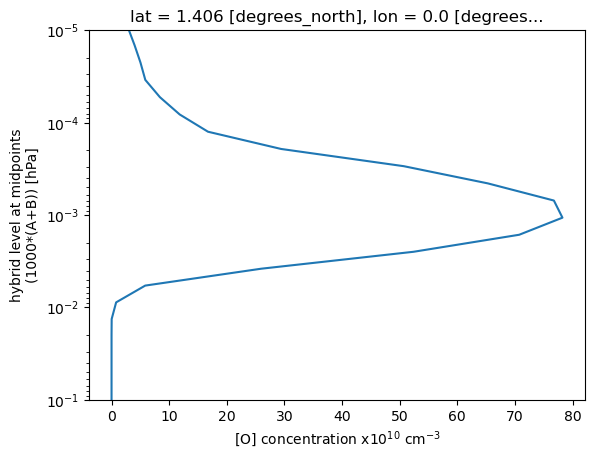

In [27]:

### Calculate number density: particles cm^-3
# Conversion constants
k = 1.380649e-23 # Boltzmann constant J K^-1 = kg m^2 s^-2 K^-1
to_cm3 = 1e6 # convertion from m^3 to cm^3
to_Pa = 100 # convert from hPa to Pa. Pa = kg m^-1 s^-2
n = ds['lev']*to_Pa/(to_cm3*k*ds['T'])/1e10# kg m^-1 s^-2 * kg^-1 m^-2 s^2 K * K^-1 = m^-3 | m^-3 * 1e-6 = cm^-3

### Plot data
var = 'O'
data = ds[var]*n
data.plot(y="lev",yscale="log",ylim=[1e-1,1e-5])
plt.xlabel("[O] concentration x10$^{10}$ cm$^{-3}$")
### See below for observations

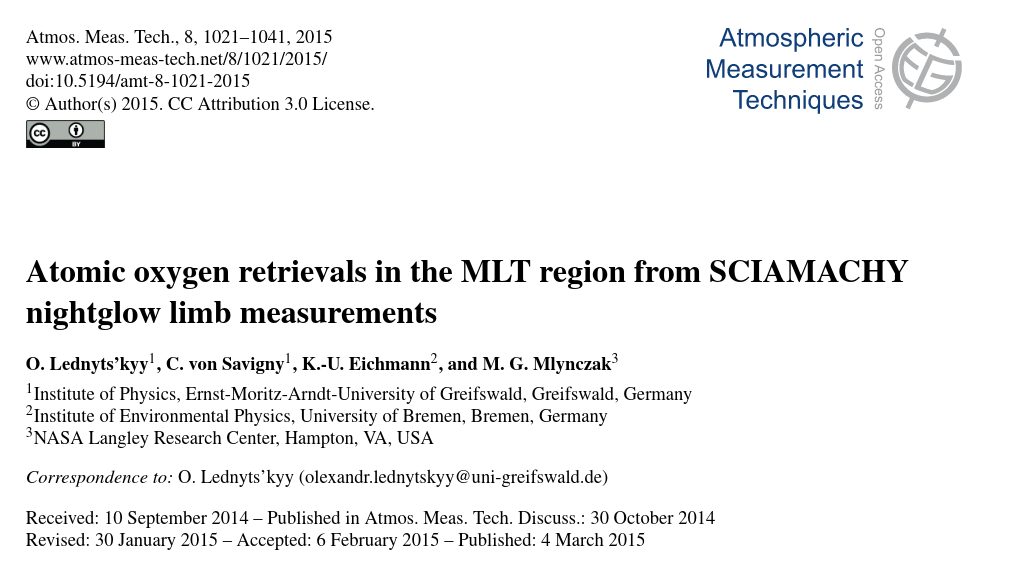

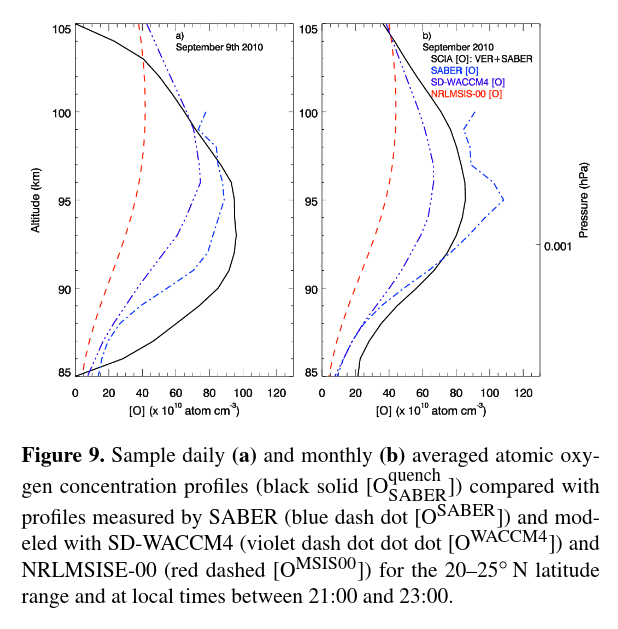

## Omega

Text(0.5, 0, 'vertical velocity w m s$^{-1}$')

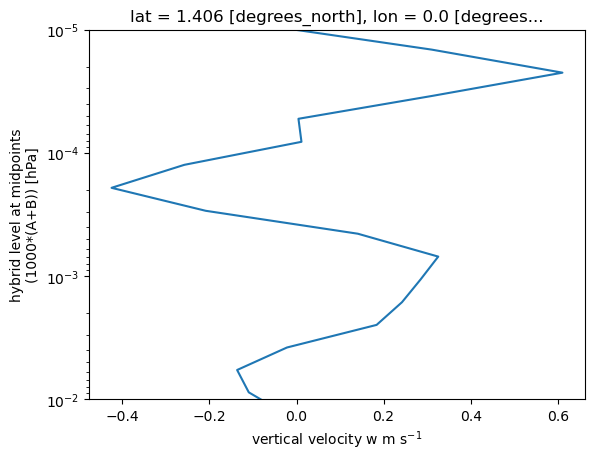

In [33]:
### Convert Pa/s to m/s (take care with units!)

### Calculate mass density: kg m^-3
# Conversion constants
R = 287.058 # J/ kg^-1 K^-1 => m^2 s^-2 K^-1
to_Pa = 100 # convert from hPa to Pa. Pa => kg m^-1 s^-2
rho = ds['lev']*to_Pa/(R*ds['T']) # Units: kg m^-1 s^-2 * m^-2 s^2 K * K^-1 => kg m^-3

g = 9.80665 # m s^-2
w = -ds['OMEGA']/(rho*g) # Units: kg m^-1 s^-2 * s^-1 * kg^-1 m^3 * m^-1 s^2 => m s^-1

w.plot(y="lev",yscale="log",ylim=[1e-2,1e-5])
plt.xlabel("vertical velocity w m s$^{-1}$")